In [1]:
import pandas as pd 
salary_data=pd.read_csv("Salary_Data.csv")
salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [2]:
salary_data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [3]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
salary_data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
salary_data.dropna(inplace=True)

In [8]:
salary_data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
salary_data['Gender']=le.fit_transform(salary_data['Gender'])
salary_data['Education Level']=le.fit_transform(salary_data['Education Level'])
salary_data['Job Title']=le.fit_transform(salary_data['Job Title'])


In [10]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   int64  
 2   Education Level      6698 non-null   int64  
 3   Job Title            6698 non-null   int64  
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 366.3 KB


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Salary'>

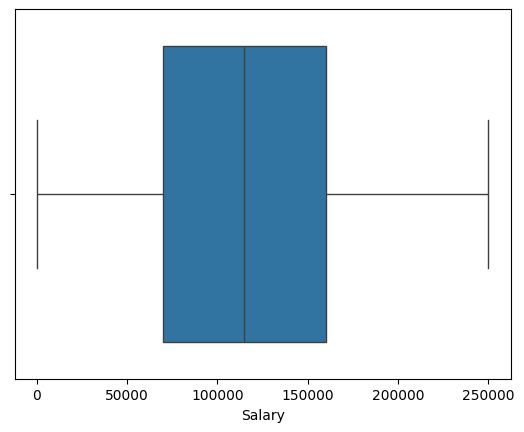

In [12]:
sns.boxplot(x=salary_data['Salary'])

In [13]:
q3=salary_data['Salary'].quantile(0.75)
q1=salary_data['Salary'].quantile(0.25)

In [14]:
print(q3)
print(q1)

160000.0
70000.0


In [16]:
iqr=q3-q1
iqr

np.float64(90000.0)

In [17]:
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
print(upper_bound)
print(lower_bound)

295000.0
-65000.0


In [18]:
d=salary_data[~((salary_data['Salary']>=(q1-1.5*iqr))&(salary_data['Salary']<=(q3+1.5*iqr)))]


In [19]:
x=salary_data.drop(['Salary'],axis=1)
y=salary_data['Salary']
x

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1,0,175,5.0
1,28.0,0,3,18,3.0
2,45.0,1,5,144,15.0
3,36.0,0,0,115,7.0
4,52.0,1,3,25,20.0
...,...,...,...,...,...
6699,49.0,0,5,33,20.0
6700,32.0,1,2,115,3.0
6701,30.0,0,1,41,4.0
6702,46.0,1,4,96,14.0


In [20]:
y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6698, dtype: float64

In [30]:
from sklearn.preprocessing import StandardScaler
ms=StandardScaler()
z=ms.fit_transform(x)


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(5358, 5)
(1340, 5)
(5358,)
(1340,)


In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [33]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



In [34]:
print(r2_score(y_test,y_pred))


0.675098629018035


In [35]:
print(mean_absolute_error(y_test,y_pred))

24024.935439841032


In [36]:
print(mean_squared_error(y_test,y_pred))

926443019.1550828


In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_test,y_test)
y_pred=lr.predict(x_test)

In [38]:
print(r2_score(y_test,y_pred))


0.6768400600221136


In [40]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9696439635451962
2952.1684182784584
86559000.8985565


In [42]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(x_test,y_test)
y_pred=dr.predict(x_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
#therefore it is underfit and has variance of 3

0.9981056383898982
615.9664284637419
5401694.933234368


In [45]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()
rr.fit(x_train,y_train)
y_pred=rr.predict(x_test)

In [46]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9759672150001224
3239.402476927919
68528507.05646142


In [47]:
r=RandomForestRegressor()
rr.fit(x_test,y_test)
y_pred=rr.predict(x_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
#it is under fit and has variance of 2

0.9925639846577028
2385.833493318915
21203494.720198553


In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [50]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9669506821364754
4026.8531343283585
94238783.08041792


In [51]:
knn=KNeighborsRegressor()
knn.fit(x_test,y_test)
y_pred=knn.predict(x_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
#thhis is generalised prediction

0.9603270278714887
5912.412835820896
113125863.29355223


In [53]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

In [54]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.002617881886506135
46244.02034571548
2843994465.039201


In [55]:
svr=SVR()
svr.fit(x_test,y_test)
y_pred=svr.predict(x_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
#the svr method cannot be usedas the r2_score is.0006

0.0006122990028240016
46285.445070738664
2849713302.901622


In [57]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [58]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6590422377399432
20618.05
972227164.5634328


In [59]:
gnb.fit(x_test,y_test)
y_pred=gnb.predict(x_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
#this method too cannot be used


0.6874820830854883
19130.58805970149
891132104.5253731


In [ ]:
#the best algorithm to be used is knn(kneighbors)